In [25]:
# Main dependencies
import numpy
import numpy as np
import scipy.fftpack

import matplotlib
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [5]:
def fftind(size):
    """ Returns a numpy array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            size (integer): The size of the coordinate array to create
        Returns:
            k_ind, numpy array of shape (2, size, size) with:
                k_ind[0,:,:]:  k_x components
                k_ind[1,:,:]:  k_y components
                
        Example:
        
            print(fftind(5))
            
            [[[ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]]
            [[ 0  0  0  0  0]
            [ 1  1  1  1  1]
            [-3 -3 -3 -3 -3]
            [-2 -2 -2 -2 -2]
            [-1 -1 -1 -1 -1]]]
            
        """
    k_ind = numpy.mgrid[:size, :size] - int( (size + 1)/2 )
    k_ind = scipy.fftpack.fftshift(k_ind)
    return( k_ind )



def gaussian_random_field(alpha = 3.0,
                          size = 128, 
                          flag_normalize = True):
    """ Returns a numpy array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            alpha (double, default = 3.0): 
                The power of the power-law momentum distribution
            size (integer, default = 128):
                The size of the square output Gaussian Random Fields
            flag_normalize (boolean, default = True):
                Normalizes the Gaussian Field:
                    - to have an average of 0.0
                    - to have a standard deviation of 1.0
        Returns:
            gfield (numpy array of shape (size, size)):
                The random gaussian random field
                
        Example:
        import matplotlib
        import matplotlib.pyplot as plt
        example = gaussian_random_field()
        plt.imshow(example)
        """
        
        # Defines momentum indices
    k_idx = fftind(size)

        # Defines the amplitude as a power law 1/|k|^(alpha/2)
    amplitude = numpy.power( k_idx[0]**2 + k_idx[1]**2 + 1e-10, -alpha/4.0 )
    amplitude[0,0] = 0
    
        # Draws a complex gaussian random noise with normal
        # (circular) distribution
    noise = numpy.random.normal(size = (size, size)) \
        + 1j * numpy.random.normal(size = (size, size))
    
        # To real space
    gfield = numpy.fft.ifft2(noise * amplitude).real
    
        # Sets the standard deviation to one
    if flag_normalize:
        gfield = gfield - numpy.mean(gfield)
        gfield = gfield/numpy.std(gfield)
        
    return gfield, amplitude

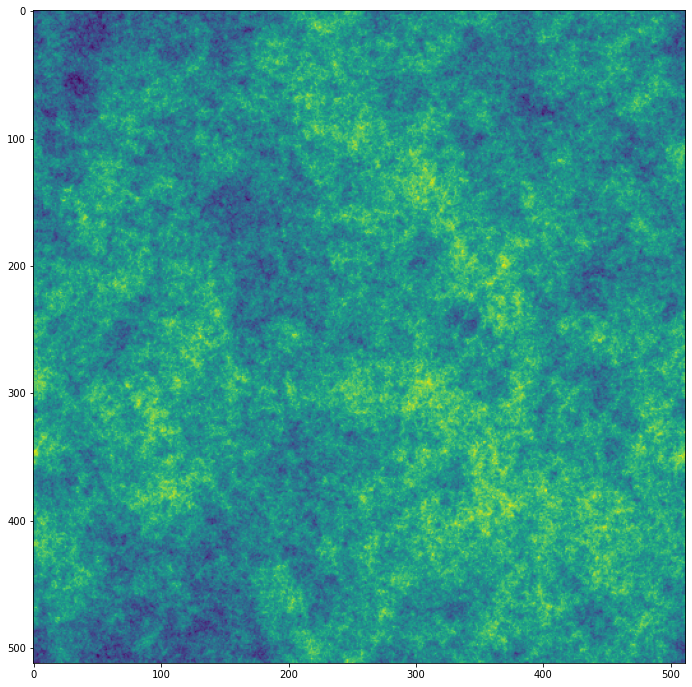

mean:  -2.190088388420719e-17
std:  1.0


In [6]:
example,amplitude = gaussian_random_field(alpha=2,size=512)
plt.figure(figsize=(12,12))
plt.imshow(example)
plt.show()
print('mean: ', numpy.mean(example))
print('std: ', numpy.std(example))

In [1]:
## Now try convolve this Gaussian field with a scattering network
from kymatio.numpy import Scattering2D

In [34]:
scattering = Scattering2D(J=4, shape=(512, 512))

In [35]:
scattered=scattering(example)

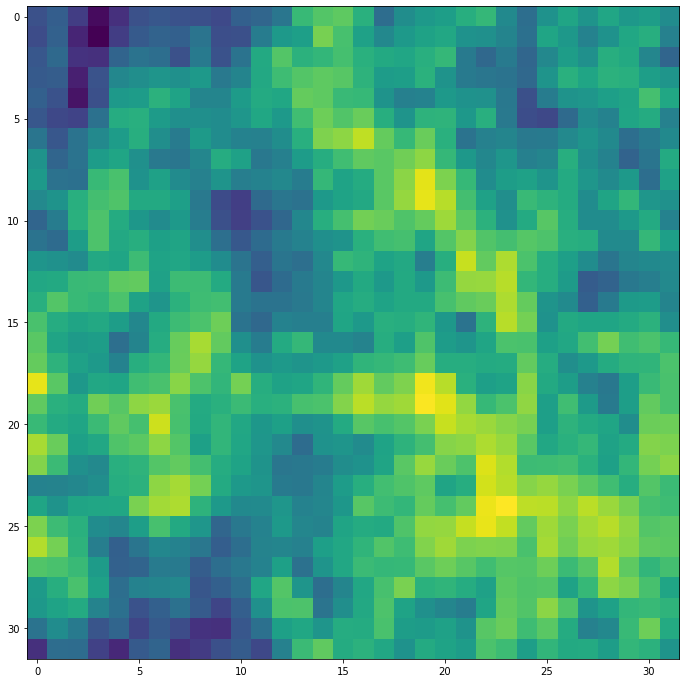

In [37]:
plt.figure(figsize=(12,12))
plt.imshow(scattered[0])
plt.show()

In [33]:
scattered

array([[[-2.24205011, -1.93677572, -1.20549478, ..., -0.76779094,
         -1.37984315, -1.36837417],
        [-1.43589608, -1.2362129 , -0.95784112, ..., -0.05966419,
         -0.50422882, -1.28897182],
        [-1.04358421, -1.48478746, -0.60743791, ..., -0.49679175,
         -0.69442198, -1.2028545 ],
        ...,
        [-2.11668044, -2.02156316, -1.7854754 , ..., -0.78577845,
         -1.63360479, -2.17502632],
        [-2.39588906, -2.42304207, -2.42088924, ..., -0.63179199,
         -0.76429395, -1.61036894],
        [-2.38338521, -2.43338321, -2.11389451, ..., -0.82609115,
         -0.87134139, -1.36253227]],

       [[ 0.06931983,  0.09116422,  0.08892943, ...,  0.08684758,
          0.07937793,  0.07779058],
        [ 0.06550118,  0.10073744,  0.07287179, ...,  0.10087944,
          0.08522153,  0.09660368],
        [ 0.08670728,  0.12498993,  0.11364635, ...,  0.07861992,
          0.09806709,  0.14902679],
        ...,
        [ 0.10418987,  0.0886984 ,  0.11003295, ...,  